# Descriptive Statistics, Data Exploration, Visualization, and Preprocessing

In [1]:
#Import Common library
import pandas as pd
import numpy as np

#Import Visualization library
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#Setting supaya grafik memiliki grid (Opsional)
sb.set_style('whitegrid')

In [8]:
#Read data

df = pd.read_csv(r"D:/KULIAH/Asprak PDM/2/Data Pertemuan 2.csv", sep = ';')
df

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total spent
0,05/01/2019,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83
1,08/03/2019,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40
2,03/03/2019,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31
3,27/01/2019,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76
4,08/02/2019,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17
...,...,...,...,...,...,...,...,...,...,...,...
995,29/01/2019,Ewallet,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,40.35
996,02/03/2019,Ewallet,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,973.80
997,09/02/2019,Cash,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,31.84
998,22/02/2019,Cash,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,65.82


### Descriptive Statistics

Statistika Deskriptif merupakan suatu metode untuk mendeskripsikan data dan memberikan gambaran umum tentang data yang dimiliki. Umumnya Statistika Deskriptif digunakan untuk memberikan informasi atau gambaran awal sebelum dilakukannya proses pemodelan atau uji statistik.

Statistika deskriptif terdiri dari
- Ukuran Pusat Data
    - Mean
    - Median
    - Modus
- Ukuran Sebaran Data
    - Range
    - IQR (Interquartile Range)
    - Variansi
    - Standar Deviasi
- Distribusi (Dilihat dengan visualisasi)
- Korelasi

In [11]:
#Mencari rata-rata variabel Total Spent

df['Total spent'].mean()

307.58738

In [14]:
#Mencari rata-rata keseluruhan data

df.mean(numeric_only = True)        # Parameter 'numeric_only' supaya hanya menghitung variabel numerik (Opsional)

Unit price      55.67213
Quantity         5.51000
Total spent    307.58738
dtype: float64

In [15]:
#Mencari median variabel Quantity

df['Quantity'].median()

5.0

In [16]:
#Mencari modus variabel Branch

df['Branch'].mode()

0    A
Name: Branch, dtype: object

In [20]:
#Menghitung Range variabel Total Spent

range = df['Total spent'].max() - df['Total spent'].min()
print(range)        # Pada Python tidak terdapat function yang menghitung range secara langsung

982.83


In [21]:
#Menghitung IQR variabel Total Spent

IQR = df['Total spent'].quantile(0.75) - df['Total spent'].quantile(0.25)
print(IQR)

330.4075


In [22]:
#Menghitung Variansi variabel Quantity

df['Quantity'].var()

8.546446446446446

In [23]:
#Menghitung Standar Deviasi variabel Quantity

df['Quantity'].std()

2.923430595455696

In [25]:
#Menghitung korelasi data

df.corr(numeric_only = True)

,Unit price,Quantity,Total spent
Unit price,1.000000,0.010778,0.633962
Quantity,0.010778,1.000000,0.705510
Total spent,0.633962,0.705510,1.000000


In [27]:
#Melihat Statisitika Deskriptif secara keseluruhan untuk variabel numerik

# df.describe()
df.describe(include = 'all')

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total spent
count,1000,1000,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.00000
unique,89,3,1000,3,3,2,5,6,NaN,NaN,NaN
top,07/02/2019,Ewallet,750-67-8428,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN
freq,20,345,1,340,340,501,498,178,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,307.58738
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.494628,2.923431,234.17651
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,10.17000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,118.49750
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,241.76000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,448.90500


### Data Exploration and Visualization

Data Exploration and Visualization umumnya digunakan menggali informasi data lebih dalam secara visual. Selain itu Data Exploration and Visualization juga digunakan untuk mencari kemiripan dalam data, korelasi antar variabel, serta pola dan outlier dalam data.

In [28]:
#Mengetahui informasi umum data
#Informasi yang tersedia mulai dari tipe data, jumlah data yang tidak kosong, jumlah baris (entries), jumlah kolom, nama-nama kolom

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Payment        1000 non-null   object 
 2   Invoice ID     1000 non-null   object 
 3   Branch         1000 non-null   object 
 4   City           1000 non-null   object 
 5   Customer type  1000 non-null   object 
 6   Gender         1000 non-null   object 
 7   Product line   1000 non-null   object 
 8   Unit price     1000 non-null   float64
 9   Quantity       1000 non-null   int64  
 10  Total spent    1000 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 86.1+ KB


In [29]:
#Mengetahui ukuran data

df.shape

(1000, 11)

In [38]:
# Mengetahui jumlah tiap kategori dalam variabel Product line

df['Product line'].value_counts()

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

In [41]:
# Mencari unique atau semua nilai yang ada dalam variabel

df['Gender'].unique()
# df['Gender'].nunique()

array(['Female', 'Male', 'fml', 'male', 'female'], dtype=object)

In [45]:
# Melihat unique semua variabel kategorik dengan looping

for col in df.columns:
    if df[col].dtype == 'object':
        print(col, df[col].unique())

# [df[col].unique() for col in df.select_dtypes('object').columns]

Date ['05/01/2019' '08/03/2019' '03/03/2019' '27/01/2019' '08/02/2019'
 '25/03/2019' '25/02/2019' '24/02/2019' '10/01/2019' '20/02/2019'
 '06/02/2019' '09/03/2019' '12/02/2019' '07/02/2019' '29/03/2019'
 '15/01/2019' '11/03/2019' '01/01/2019' '21/01/2019' '05/03/2019'
 '15/03/2019' '17/02/2019' '02/03/2019' '22/03/2019' '10/03/2019'
 '25/01/2019' '28/01/2019' '07/01/2019' '23/03/2019' '17/01/2019'
 '02/02/2019' '04/03/2019' '16/03/2019' '27/02/2019' '10/02/2019'
 '19/03/2019' '03/02/2019' '07/03/2019' '28/02/2019' '27/03/2019'
 '20/01/2019' '12/03/2019' '15/02/2019' '06/03/2019' '14/02/2019'
 '13/03/2019' '24/01/2019' '06/01/2019' '11/02/2019' '22/01/2019'
 '13/01/2019' '09/01/2019' '12/01/2019' '26/01/2019' '23/01/2019'
 '23/02/2019' '02/01/2019' '09/02/2019' '26/03/2019' '01/03/2019'
 '01/02/2019' '28/03/2019' '24/03/2019' '05/02/2019' '19/01/2019'
 '16/01/2019' '08/01/2019' '18/02/2019' '18/01/2019' '16/02/2019'
 '22/02/2019' '29/01/2019' '04/01/2019' '30/03/2019' '30/01/2019'
 '03/

In [48]:
# Mencari nilai missing value setiap variabel

df.isna().sum()

Date             0
Payment          0
Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Total spent      0
dtype: int64

In [50]:
# Mencari apakah ada nilai yang terduplikat

df.duplicated().any()
df.duplicated().sum()

0

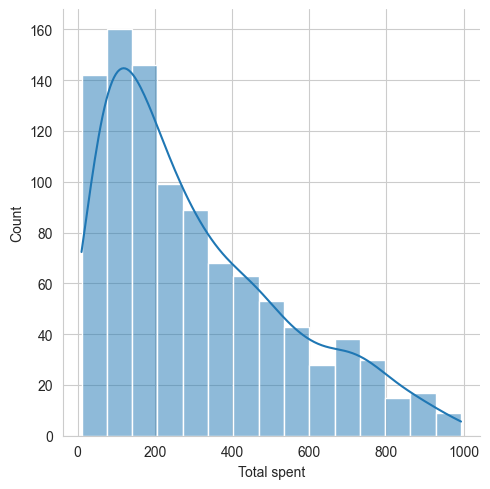

In [53]:
# Mengetahui Distribusi variabel Quantity melalui grafik
# Menggunakan seaborn

sb.displot(df['Total spent'], kde = True)

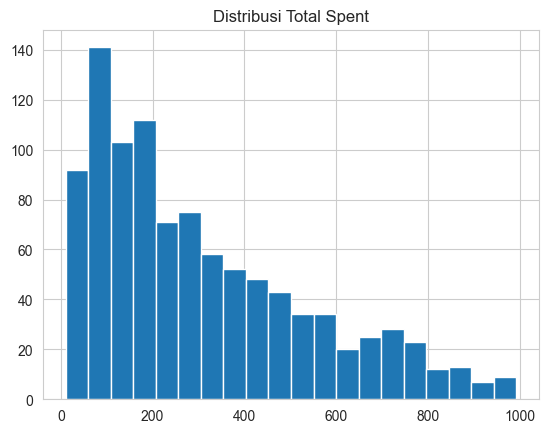

In [54]:
# Menggunakan matplotlib

plt.hist(df['Total spent'], bins = 20)

plt.title('Distribusi Total Spent')
plt.show()

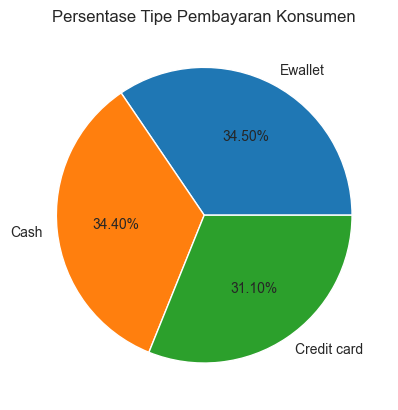

In [60]:
#Melihat perbandingan jumlah tipe Payment

label_list = df['Payment'].value_counts().index

plt.pie(x = df['Payment'].value_counts(), 
        labels = label_list, 
        autopct = "%.2f%%")

plt.title('Persentase Tipe Pembayaran Konsumen')
plt.show()

<Axes: xlabel='Branch', ylabel='count'>

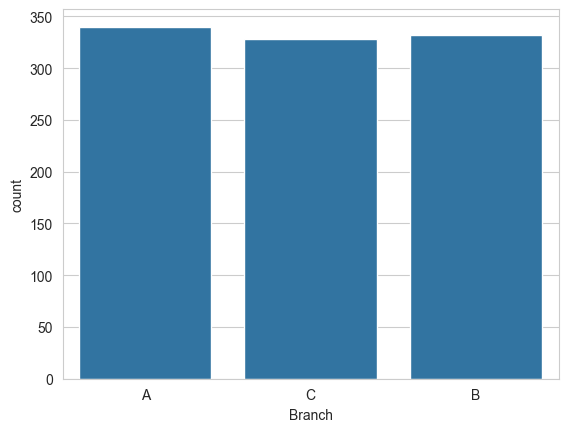

In [64]:
#Melihat jumlah konsumen berdasarkan kategori branch

sb.countplot(data = df, x = 'Branch')

#plt.show()         # Tambahkan syntax ini jika grafik tidak muncul

<Axes: >

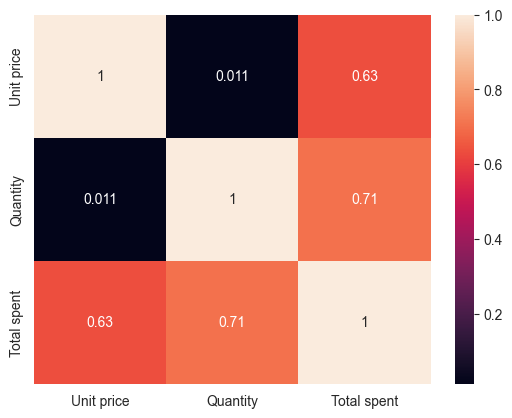

In [67]:
#Membuat Heatmap korelasi data

sb.heatmap(df.corr(numeric_only = True), annot = True)

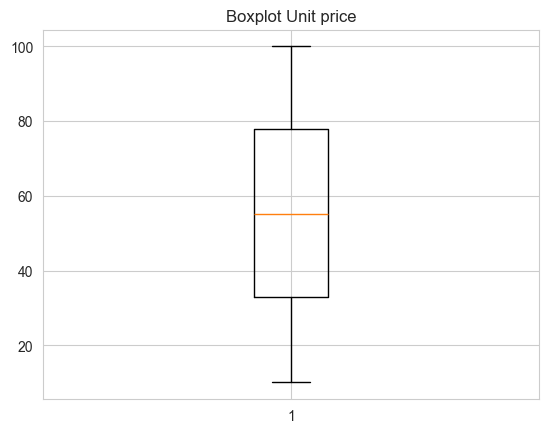

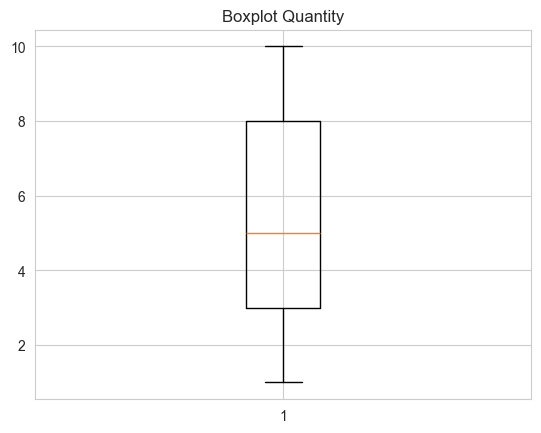

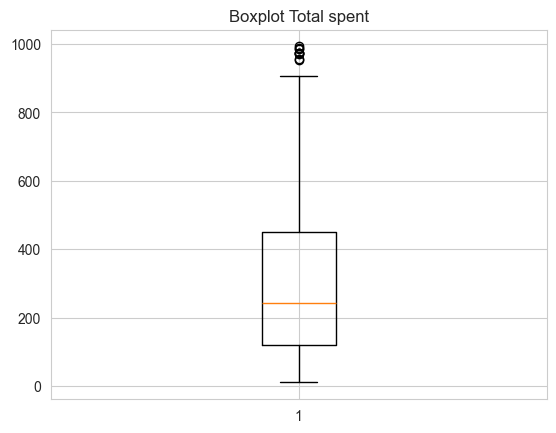

In [68]:
#Membuat boxplot untuk semua variabel numerik

for col in ['Unit price', 'Quantity', 'Total spent']:
    plt.boxplot(df[col])
    plt.title('Boxplot ' + col)
    plt.show()

<Axes: xlabel='Payment', ylabel='count'>

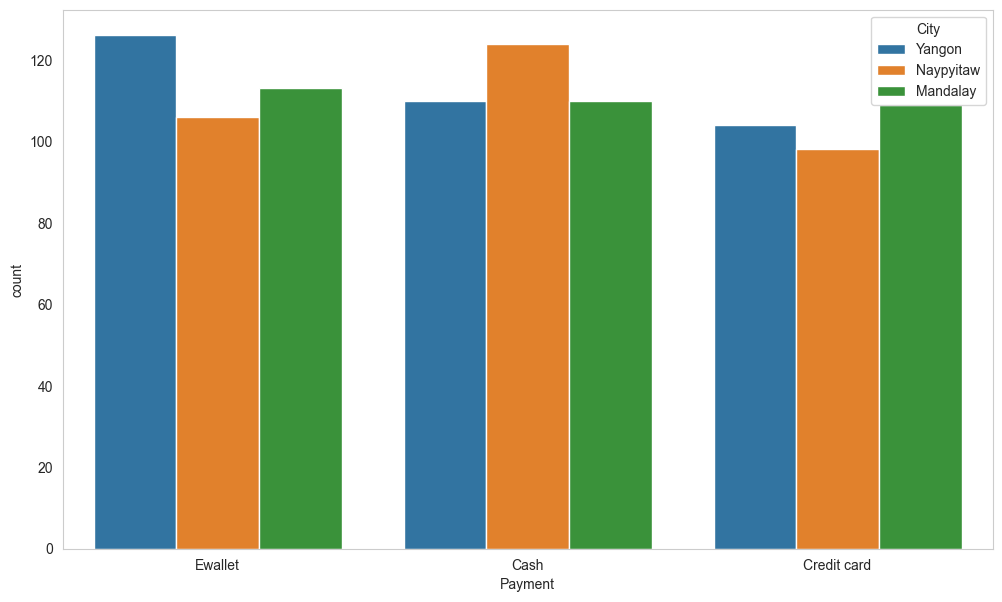

In [71]:
# Mengatur ukuran output grafik

plt.figure(figsize = (12,7))    # Mengatur ukuran dalam satuan inch
plt.grid(visible = None)        # Menghilangkan Grid

sb.countplot(data = df, x = 'Payment', hue = 'City')

#### Tambahan Data Exploration

In [99]:
# Grouping berdasarkan variabel Product line

# df.groupby(by = 'Product line').sum()

colx = ['Unit price', 'Quantity', 'Total spent', 'Product line']
df[colx].groupby(by = 'Product line').sum()

,Unit price,Quantity,Total spent
Product line,,,
Electronic accessories,9103.77,971,51750.03
Fashion accessories,10173.35,902,51719.90
Food and beverages,9745.54,952,53471.28
Health and beauty,8337.88,854,46851.18
Home and lifestyle,8850.71,911,51297.06
Sports and travel,9460.88,920,52497.93


In [100]:
# Grouping dengan 2 variabel

# df.groupby(by = ['Product line', 'Gender']).mean()

colx.append('Gender')
df[colx].groupby(by = ['Product line', 'Gender']).mean()

Unit price  Quantity  Total spent
Product line           Gender                                   
Electronic accessories Female   52.113012  5.819277   308.153012
                       Male     55.041765  5.611765   301.426353
                       fml      46.950000  5.000000   234.750000
                       male     52.890000  6.000000   317.340000
Fashion accessories    Female   55.874526  5.505263   303.478211
                       Male     59.058049  4.536585   277.218293
                       female   22.510000  7.000000   157.570000
Food and beverages     Female   59.772697  5.719101   349.994944
                       Male     52.152375  5.112500   259.441375
                       female   88.360000  5.000000   441.800000
                       male     41.305000  7.250000   281.155000
Health and beauty      Female   51.089219  5.359375   276.205156
                       Male     57.257126  5.839080   332.340805
                       male     86.800000  3.000000   260.400000
Home and lifestyle     Female   57.242532  6.303797   362.108228
                       Male     53.683875  5.050000   279.824375
                       male     33.840000  9.000000   304.560000
Sports and travel      Female   54.367273  5.636364   309.250227
                       Male     59.808684  5.526316   328.625658
                       male     65.550000  2.000000   154.180000

In [101]:
# Mengelompokkan berdasarkan variabel dan menghitung lebih dari satu nilai statistik deskriptif

df.groupby(by = 'Product line').agg({'Unit price': 'sum',
                                     'Quantity': ['max', 'median', 'min'],
                                     'Total spent': ['sum', 'mean']})

Unit price Quantity            Total spent            
                              sum      max median min         sum        mean
Product line                                                                 
Electronic accessories    9103.77       10    6.0   1    51750.03  304.411941
Fashion accessories      10173.35       10    5.0   1    51719.90  290.561236
Food and beverages        9745.54       10    5.0   1    53471.28  307.306207
Health and beauty         8337.88       10    6.0   1    46851.18  308.231447
Home and lifestyle        8850.71       10    6.0   1    51297.06  320.606625
Sports and travel         9460.88       10    6.0   1    52497.93  316.252590

In [105]:
# Membuat Pivot table

df.pivot_table(values = 'Total spent', index = ['Product line', 'Customer type'], aggfunc = 'sum', columns = 'Payment')

Payment                                   Cash  Credit card   Ewallet
Product line           Customer type                                 
Electronic accessories Member          8005.24      6604.86   8721.80
                       Normal         11737.60      8088.49   8592.04
Fashion accessories    Member          6148.85      8625.31  10296.28
                       Normal         10626.19      7884.28   8138.99
Food and beverages     Member         10245.71     11199.11   8419.58
                       Normal          8050.36      8072.50   7484.02
Health and beauty      Member          8554.04      9145.91   6901.04
                       Normal          7816.54      6063.11   8370.54
Home and lifestyle     Member         11013.68      7407.48   8224.58
                       Normal          6690.13      5909.73  12051.46
Sports and travel      Member          8090.59     12037.78   6761.44
                       Normal          9884.47      4930.08  10793.57

#### Tambahan Data Visualization

In [110]:
# Run jika belum mempunyai library ydata-profiling

# !pip install ydata-profiling

In [108]:
import ydata_profiling as pf

full_profile = pf.ProfileReport(df, title='Profiling Report', html={'style':{'full_width':True}})

ModuleNotFoundError: No module named 'ydata_profiling'

Pandas Profiling merupakan salah satu module python untuk visualisasi data. Pandas profiling dapat secara otomatis mengeksplor dan memvisualisasikan data yang kita miliki, mulai dari distribusi, korelasi, banyak variabel dan observasi, dan masih banyak lagi.

Namun, disamping dengan banyaknya keunggulan positif yang terdapat pada module tersebut, pandas profiling memiliki satu kekurangan yaitu 'berat'. Pandas profiling akan membutuhkan kapasitas RAM yang cukup tinggi, terutama jika data yang dimiliki berdimensi besar. Maka dari itu, pandas profiling kurang disarankan untuk dilakukan karena membutuhkan waktu yang lebih banyak.

In [242]:
#full_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Data Preprocessing

Data preprocessing merupakan tahapan dalam analisis data guna mempersiapkan data sebelum dilakukan tahap pemodelan. Beberapa tahapan dalam data preprocessing secara umum adalah
- Data Cleaning
    Membersihkan data dengan cara mengisi nilai yang hilang, memperbaiki data inkonsisten, menghapus duplikat, melengkapi data yang kurang lengkap, dan sebagainya
- Data Transformation
    Mengubah bentuk data supaya sesusai dengan apa yang diinginkan algoritma pemodelan. Contoh Transformasi data dapat ditemui pada Data Scaling, membuat variabel Dummy, mengubah bentuk data, normalisasi data, Binning, Labeling, dan lain sebagainya
- Data Reduction
    Tahapan ini merupakan tahapan dimana jumlah data akan dikurangi dengan tujuan untuk meningkatkan akurasi. Data reduction dapat dilakukan dengan Dimensionality reduction atau data compression

### Data Cleaning

#### Handling Missing Values

Pada saat kita mencari dan mendapatkan data, tentunya kerap kali kita menemukan adanya data yang tidak lengkap. Ketidaklengkapan data tersebut umumnya disebut sebagai _missing value_. Hal tersebut dapat terjadi karena adanya kesalahan saat menyimpan file maupun kesalahan pada orang yang menginput data.

Beberapa metode untuk mengatasi masalah tersebut adalah
- Menghapus baris atau kolom dengan _missing values_
- Mengisinya dengan suatu nilai
- Membiarkan dan menggunakan algoritma yang mendukung adanya _missing values_
- Menggunakan Algoritma untuk memprediksi nilai yang hilang

In [111]:
# Load dataset dari library seaborn

df = sb.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [113]:
# Cek apakah ada nilai yang hilang

df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [114]:
# Persentase data yang hilang

pd.DataFrame({'Jumlah NA': df.isna().sum(), 'Persentase': (df.isna().sum()/len(df)*100)})

,Jumlah NA,Persentase
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
age,177,19.865320
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000
embarked,2,0.224467
class,0,0.000000
who,0,0.000000


In [235]:
# Run jika belum mempunyai module missingno

#!pip install missingno

<Axes: >

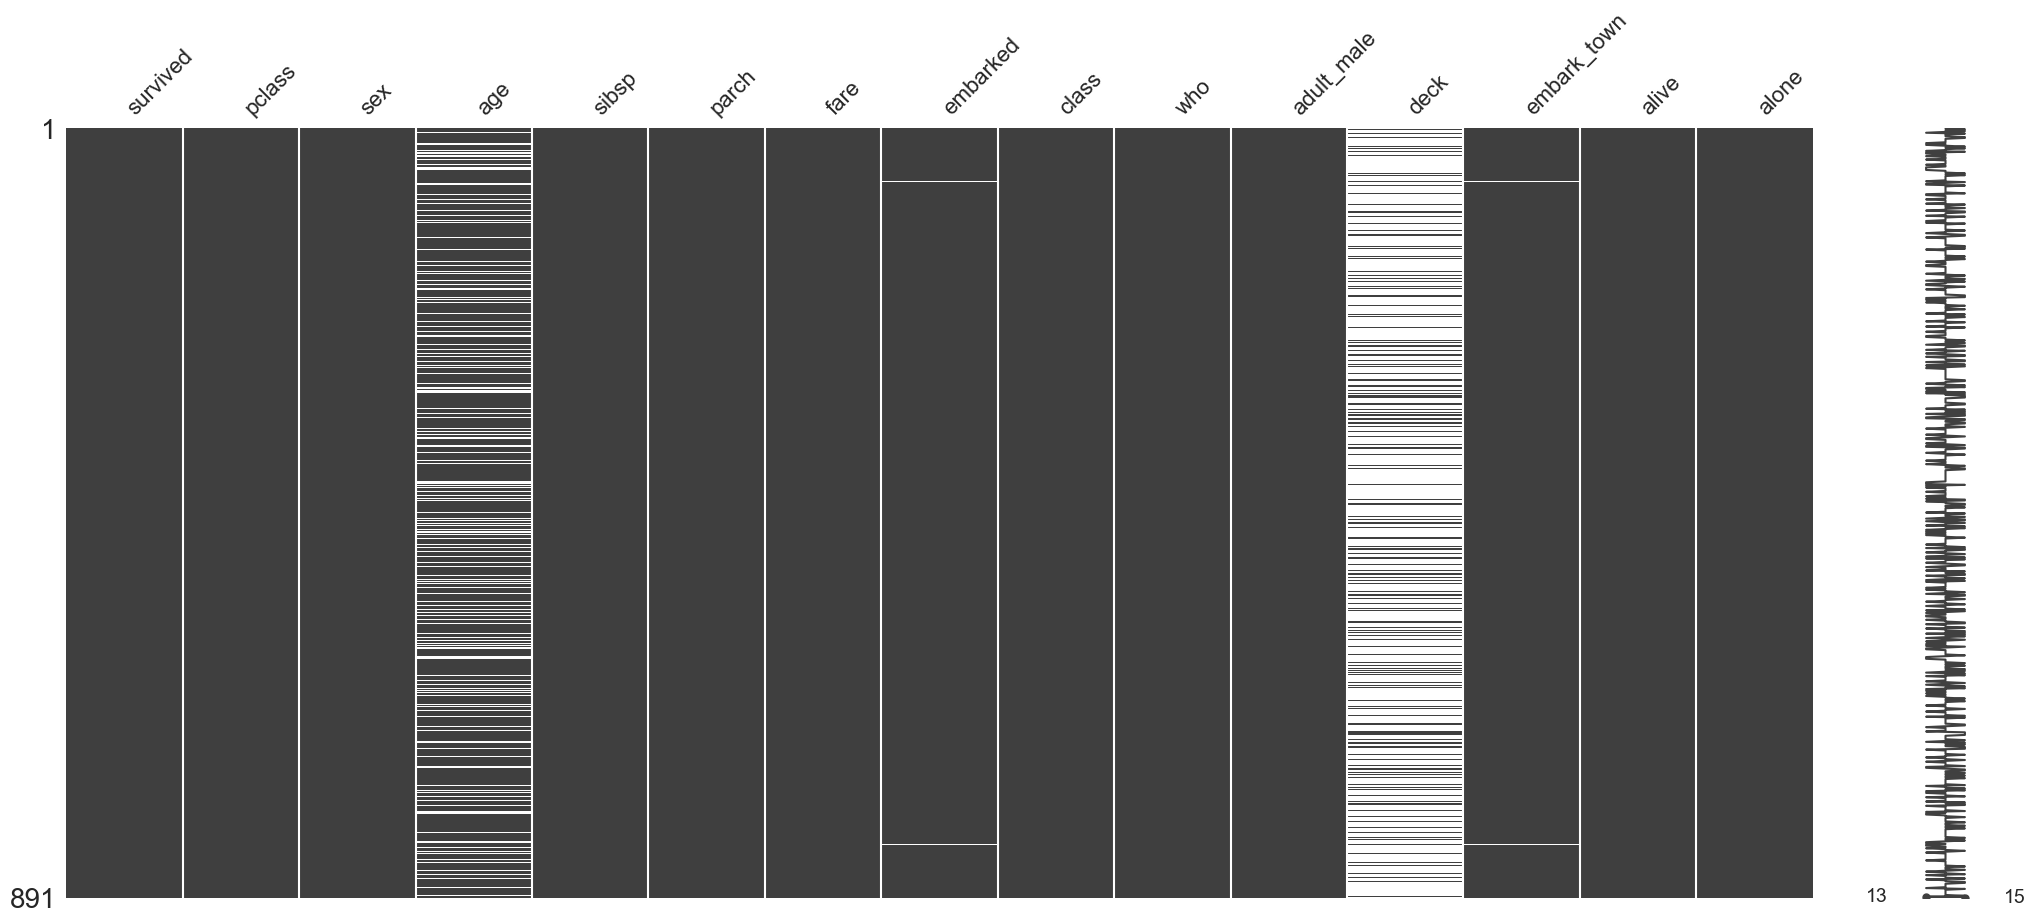

In [115]:
# Visualisasi missing value

import missingno as mno

mno.matrix(df)

In [116]:
# Menghapus baris yang mengandung NA pada variabel embarked

df.dropna(subset = 'embarked', inplace = True)

In [117]:
# Mengisi missing values dengan nilai tertentu

fill = df['age'].mean()

df['age'].fillna(fill, inplace = True)      # Mengisi Missing values dengan rata-rata
df.head(10)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10168\2659311458.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(fill, inplace = True)      # Mengisi Missing values dengan rata-rata


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,29.642093,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.000000,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.000000,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.000000,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.000000,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [118]:
# Melihat seluruh baris dengan missing value pada variabel deck

df[df['deck'].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,29.642093,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.000000,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.000000,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.000000,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,29.642093,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [119]:
# Menghapus kolom dengan dengan missing values

df.drop('deck', axis = 1, inplace = True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.642093,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


## Latihan

In [241]:
# Dapatkan data penjualan dengan Total spent lebih dari $180
# Gunakan Data Pertemuan 2

data = pd.read_excel('Data Pertemuan 2')
...             # Tulis jawaban di sini

FileNotFoundError: [Errno 2] No such file or directory: 'Data Pertemuan 2'

In [ ]:
# Apakah benar Wanita yang survive lebih banyak dari Pria yang survive?
# Berikan bukti yang mendukung

...             # Tulis jawaban di sini

In [ ]:
# Carilah rata-rata usia pria yang survive

...             # Tulis Jawaban di sini